## Objectif

L'objectif de ce projet est d'utiliser différentes techniques d'analyse de données et machine learning pour une analyse détaillée des clients d'une entreprise et faire la segmentation.

In [1]:
import os
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()
#recuperons les données
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
segmentation_url = 'https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/87e3ec06-a99f-42bf-b292-074d02f31a94.csv'
df = pd.read_csv( segmentation_url, sep=('\t'), index_col='ID')
df.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1


# Analyse exploratoire

### Description des variables

ID : Identifiant unique du client

Year_Birth : année de naissance du client

Education : niveau d'education du client

Marital_Status : Etat civil du client

Income : Revenu annuel du menage du client

Kidhome : nombre d'enfants dans le menage du client

Teenhome : Nombre d'adolescents dans le menage du client

Dt_Customer : Date d'inscription du client aupres de l'entreprise

Recency : nombre de jours depuis le dernier achat du client

Complain : 1 si le client s'est plaint au cours des 2 dernieres années, 0 sinon



MntWines : Montant dépense pour le vin au cours des 2 dernieres années

MntFruits : Montant depense en fruits au cours des 2 dernieres années

MntMeatProducts : montant dépensé pour la viande au cours des 2 dernières années

MntFishProducts : montant dépense pour le poisson au cours des 2 derniÃ¨res annÃ©es

MntSweetProducts : montant depense en sucreries au cours des 2 dernieres annees

MntGoldProds : Montant dépensé en or au cours des 2 dernières années


NumDealsPurchases : nombre d'achats effectués avec une remise

AcceptedCmp1 : 1 si le client a accepté l'offre lors de la 1Ã¨re campagne, 0 sinon

AcceptedCmp2 : 1 si le client a acceptÃ© l'offre lors de la 2Ã¨me campagne, 0 sinon

AcceptedCmp3 : 1 si le client a acceptÃ© l'offre dans la 3Ã¨me campagne, 0 sinon

AcceptedCmp4 : 1 si le client a acceptÃ© l'offre lors de la 4Ã¨me campagne, 0 sinon

AcceptedCmp5 : 1 si le client a acceptÃ© l'offre lors de la 5Ã¨me campagne, 0 sinon

Response : 1 si le client a accepté l'offre lors de la derniÃ¨re campagne, 0 sinon


NumWebPurchases : nombre d'achats effectués sur le site Web de l'entreprise

NumCatalogPurchases : Nombre d'achats effectués Ã  l'aide d'un catalogue

NumStorePurchases : Nombre d'achats effectués directement en magasin

NumWebVisitsMonth : nombre de visites sur le site Web de l'entreprise au cours du dernier mois

In [3]:
#les informations sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [4]:
#taille du dataset
df.shape

(2240, 28)

In [5]:
#les colonnes du dataset
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
#supprimons les colonnes qui ne vont pas nous servir
df = df.drop(['Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis =1)

In [7]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#voir les differentes modalités
df.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

#### Divisons notre dataset pour regrouper les données qualitatifs et les données quantitatifs

In [9]:
data = df.copy()

In [10]:
#données qualitatifs
df_qual = data.select_dtypes(object)
df_qual.head(5)

,Education,Marital_Status
ID,,
5524,Graduation,Single
2174,Graduation,Single
4141,Graduation,Together
6182,Graduation,Together
5324,PhD,Married


In [11]:
#données quantitatifs
df_quant = data.select_dtypes(exclude = object)
df_quant.head(5)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [12]:
#separons les données quantitatives
#categorielles
df_quant_cate = df_quant[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']]
df_quant_cate.head(5)

,Kidhome,Teenhome,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
ID,,,,,,,,,
5524,0,0,0,0,0,0,0,0,1
2174,1,1,0,0,0,0,0,0,0
4141,0,0,0,0,0,0,0,0,0
6182,1,0,0,0,0,0,0,0,0
5324,1,0,0,0,0,0,0,0,0


In [13]:
#non categorielles
df_quant_dist = df_quant[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
df_quant_dist.head(5)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
ID,,,,,,,,,,,,,
5524,58138.0,58,635,88,546,172,88,88,3,8,10,4,7
2174,46344.0,38,11,1,6,2,1,6,2,1,1,2,5
4141,71613.0,26,426,49,127,111,21,42,1,8,2,10,4
6182,26646.0,26,11,4,20,10,3,5,2,2,0,4,6
5324,58293.0,94,173,43,118,46,27,15,5,5,3,6,5


### Visualisons les données 

#### visualisation des données qualitatives

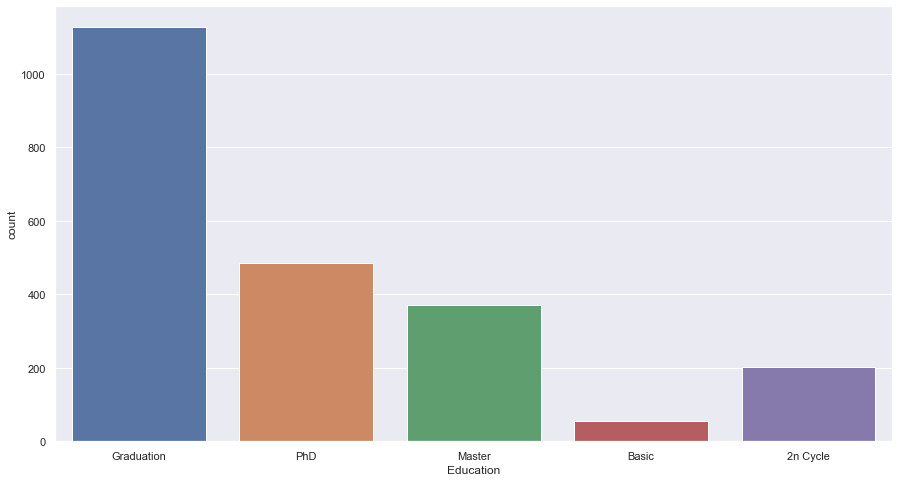

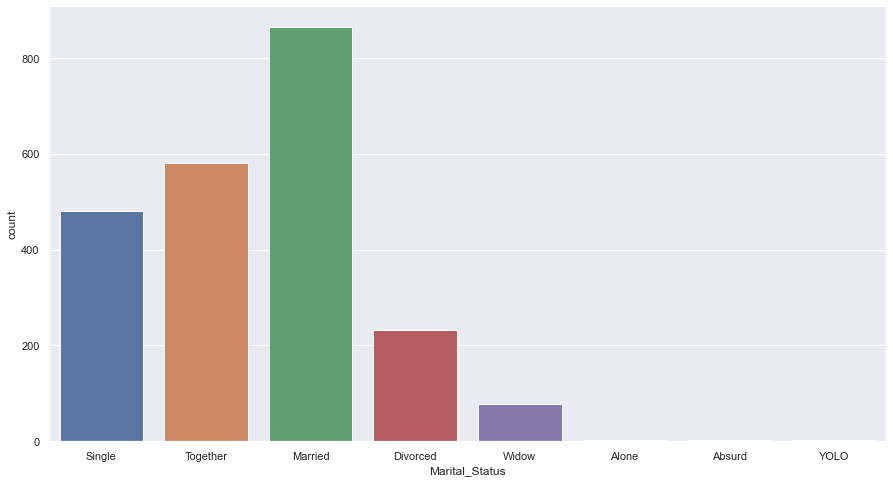

In [14]:
for col in df_qual.columns :
    sn.set(style='darkgrid')
    plt.figure(figsize = (15, 8))
    sn.countplot(x = col, data = df_qual)

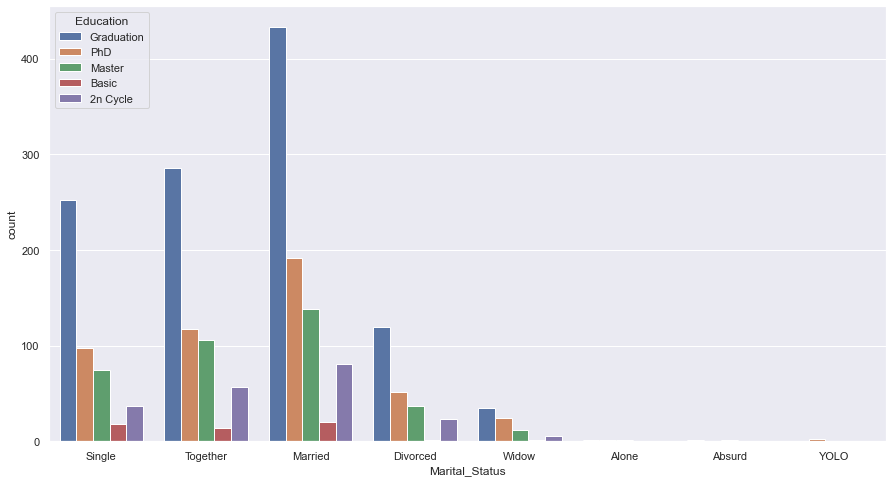

In [15]:
#croisement entre les variables qualitatives
plt.figure(figsize=(15, 8))
sn.set(style='darkgrid')
sn.countplot(x = 'Marital_Status', hue = 'Education', data = df_qual);

la visualisation des variables qualitatives nous montre que la majorité de la clientéle est mariéé, celibataire, et vit en concubinage, avec un niveau intellectuelle elevé(graduate, phd et master)

#### visualisons les données quantitatives

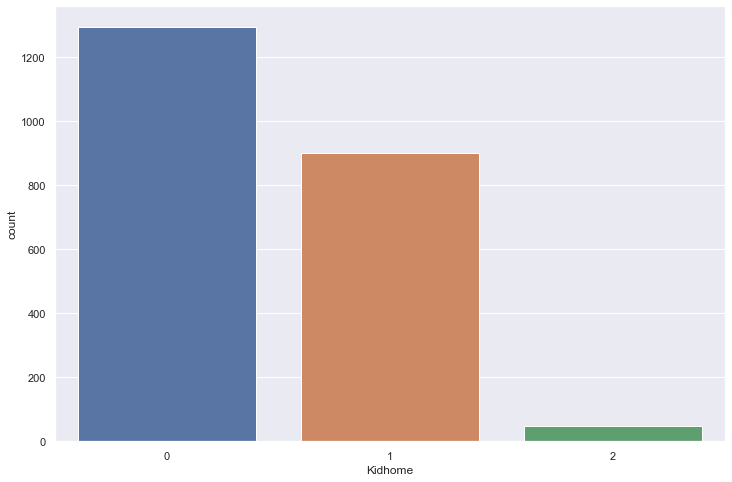

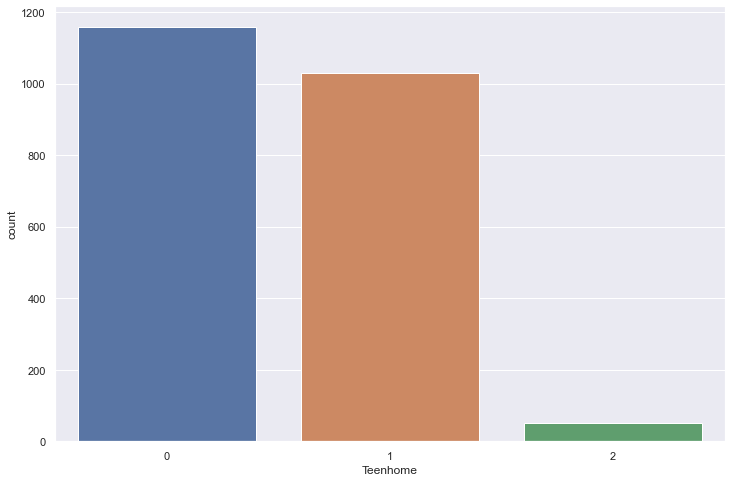

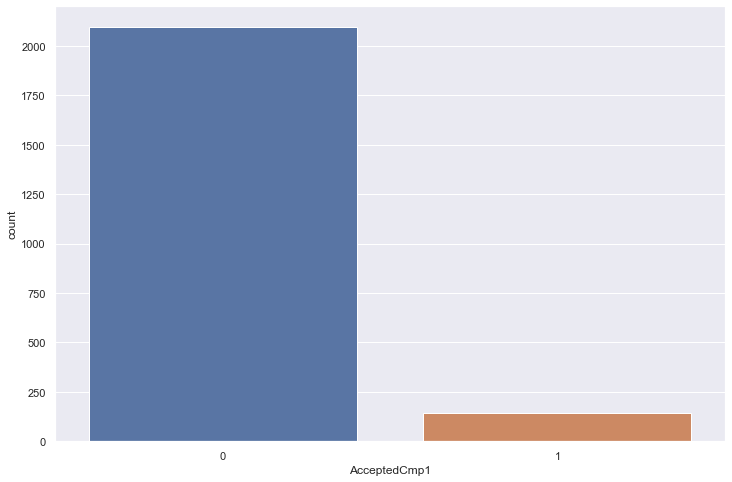

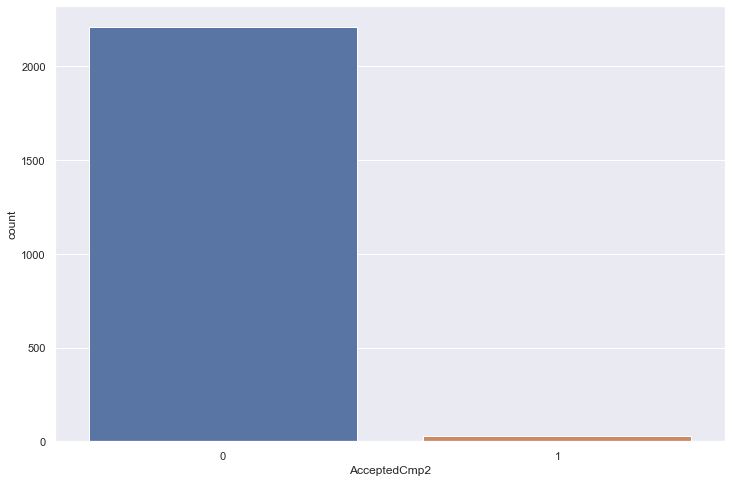

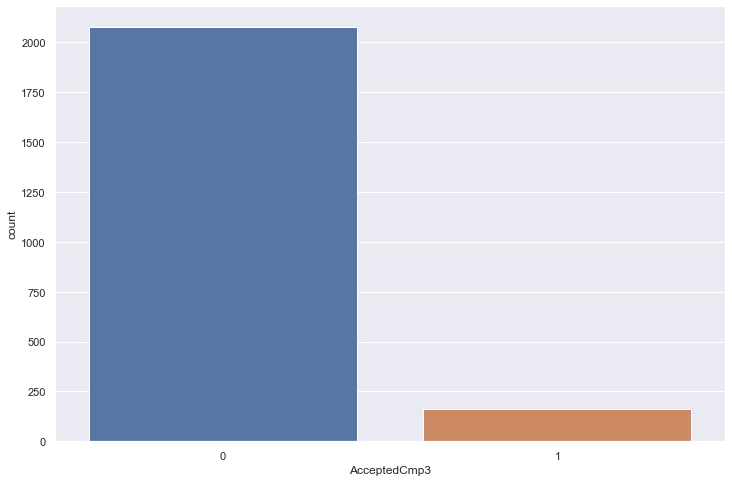

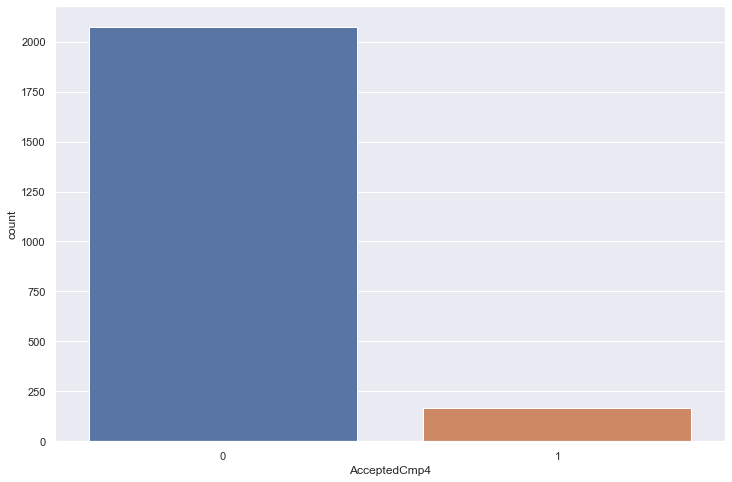

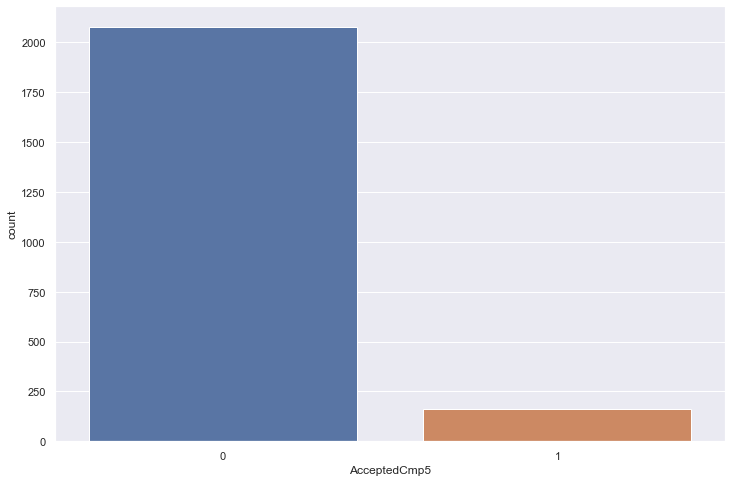

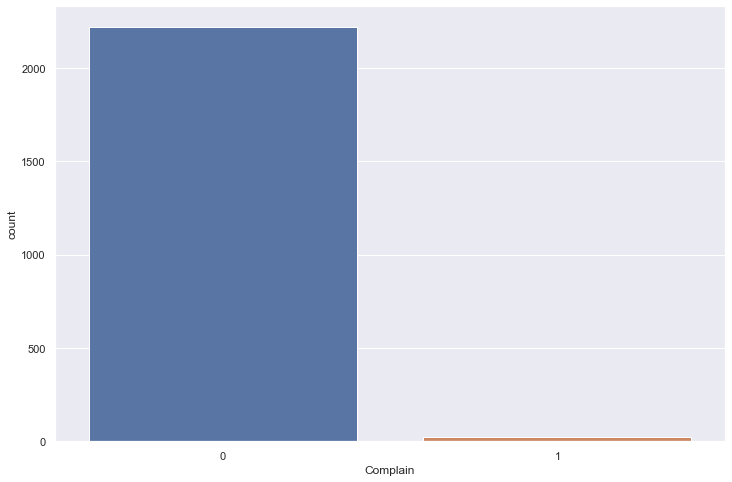

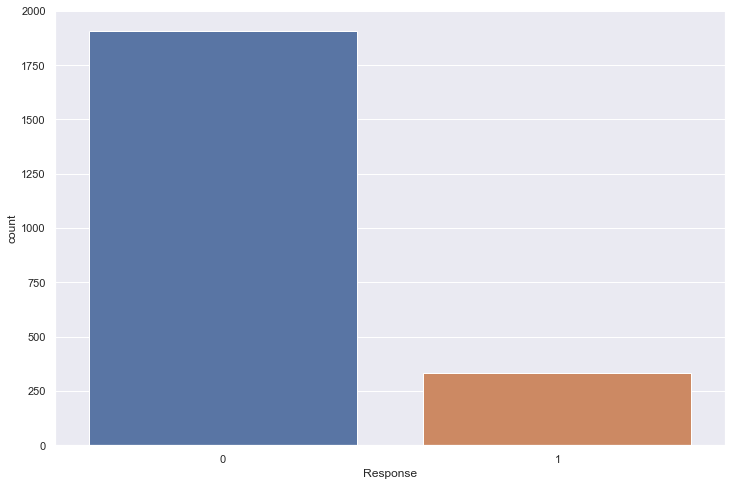

In [16]:
#variables non continue
for col in df_quant_cate.columns:
    sn.set(style='darkgrid')
    unique_vals = df_quant_cate[col].unique()
    nr_val = df_quant_cate[col].nunique()
    plt.figure(figsize=(12, 8))
    sn.countplot(df_quant_cate[col]);

la majeur partie des clients ont acceptés le dernier offre

Income


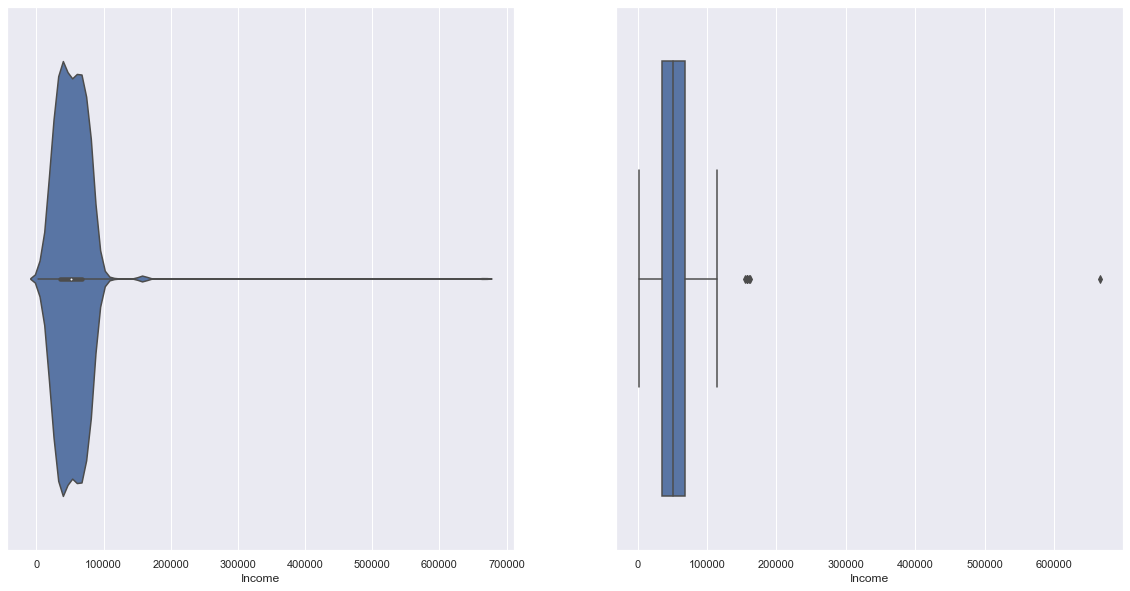

Recency


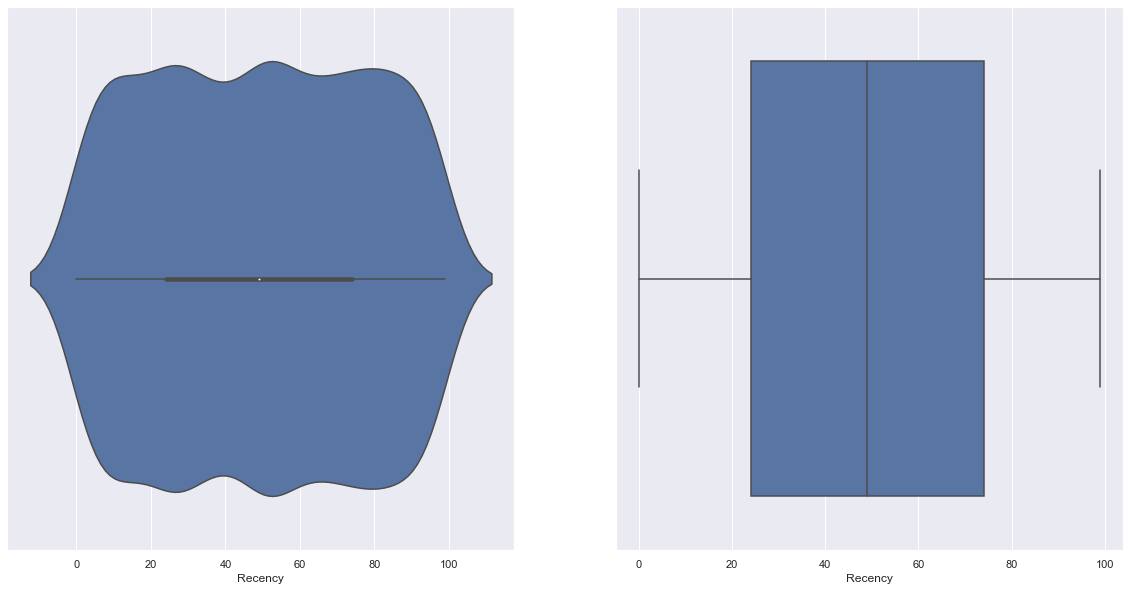

MntWines


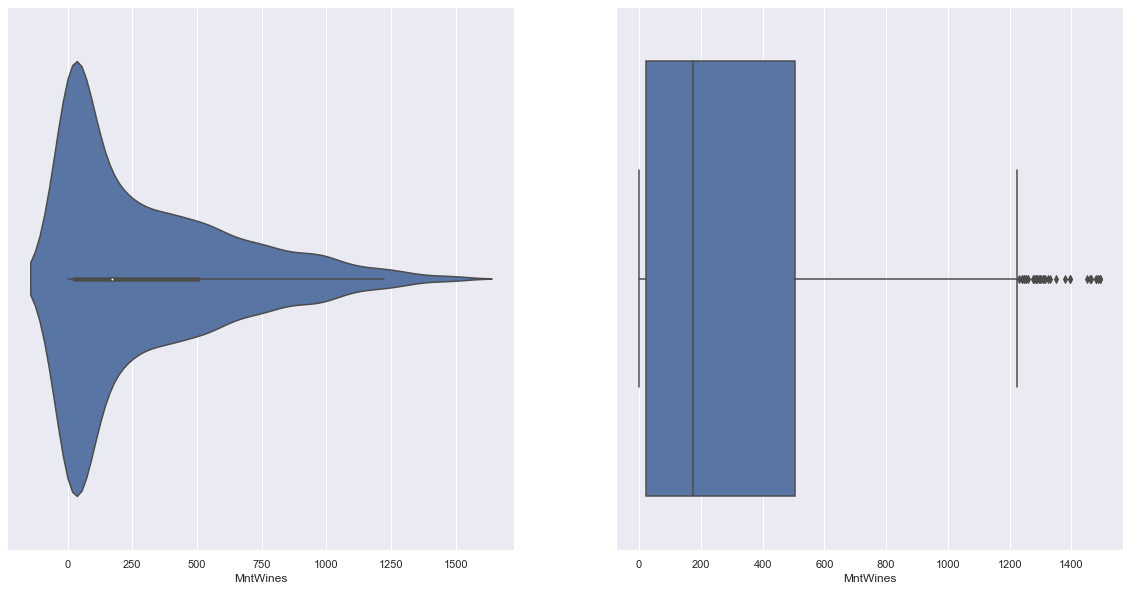

MntFruits


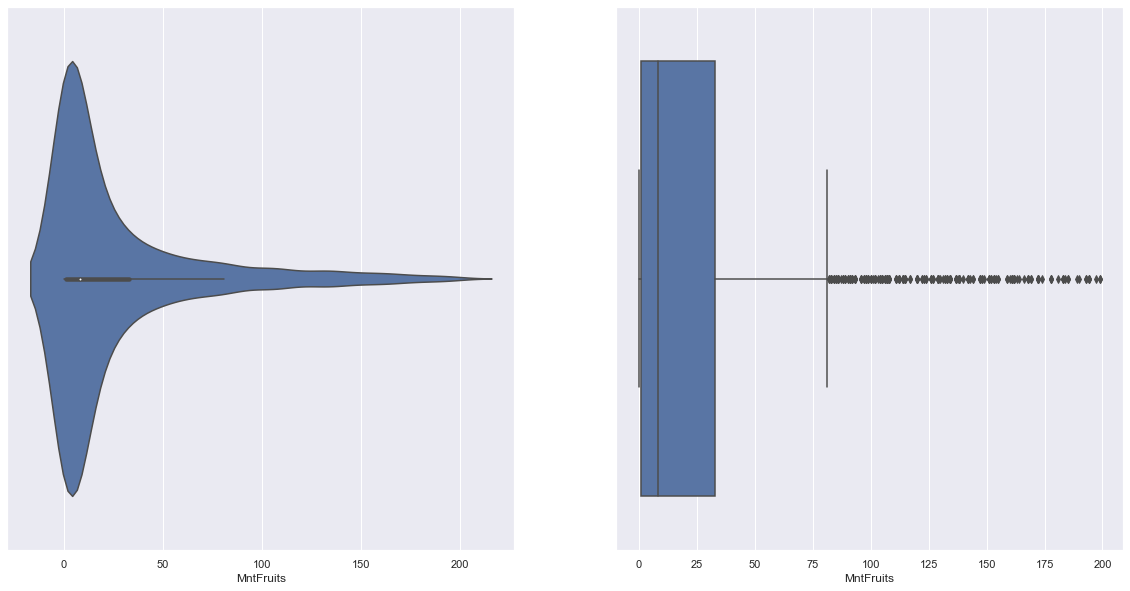

MntMeatProducts


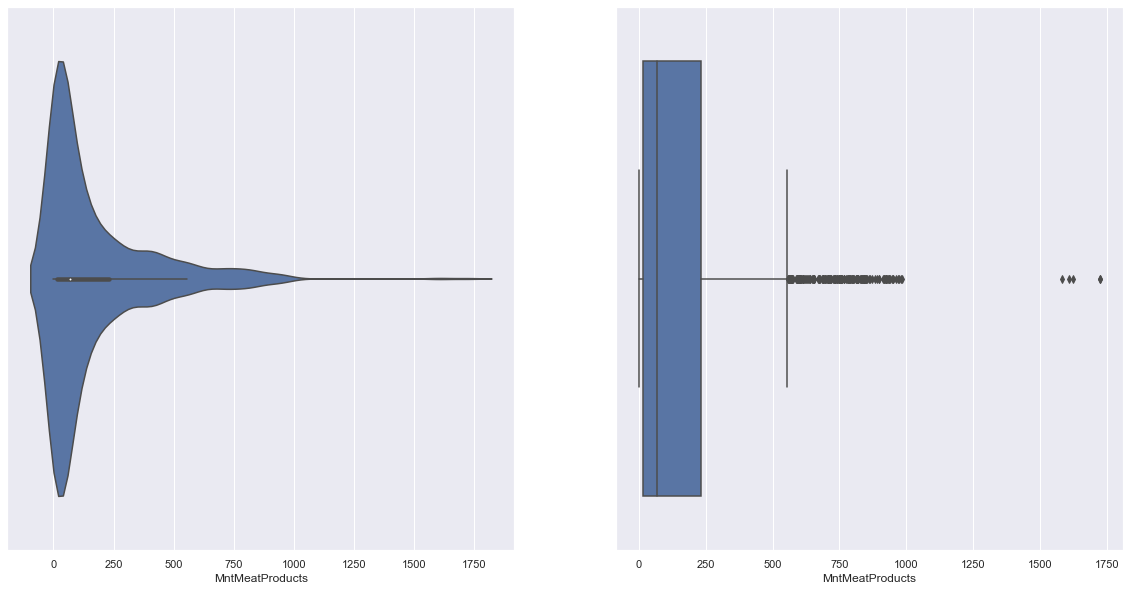

MntFishProducts


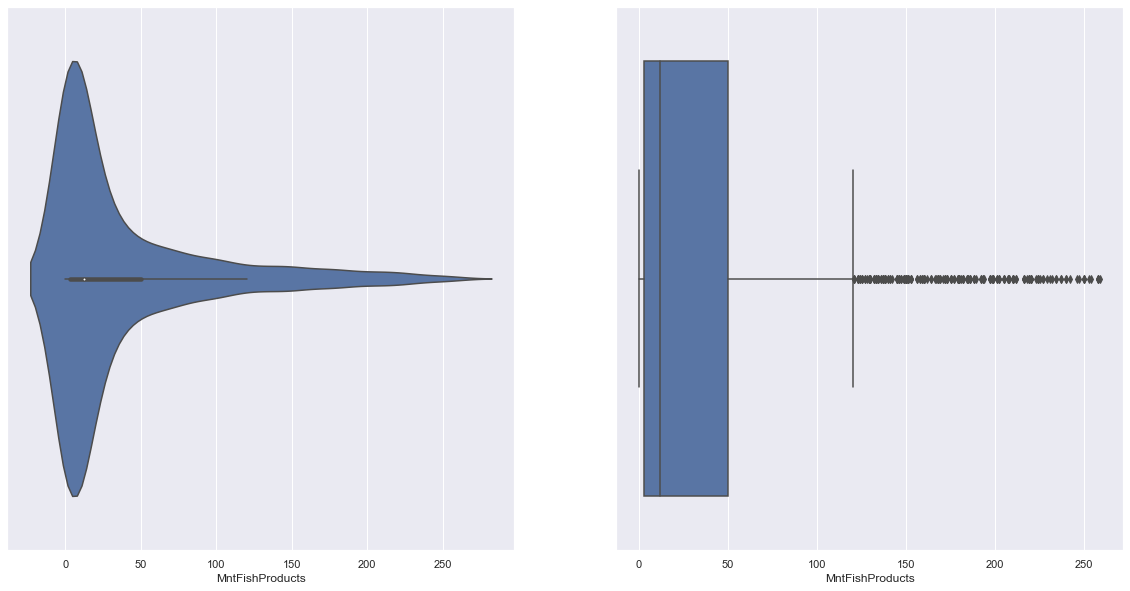

MntSweetProducts


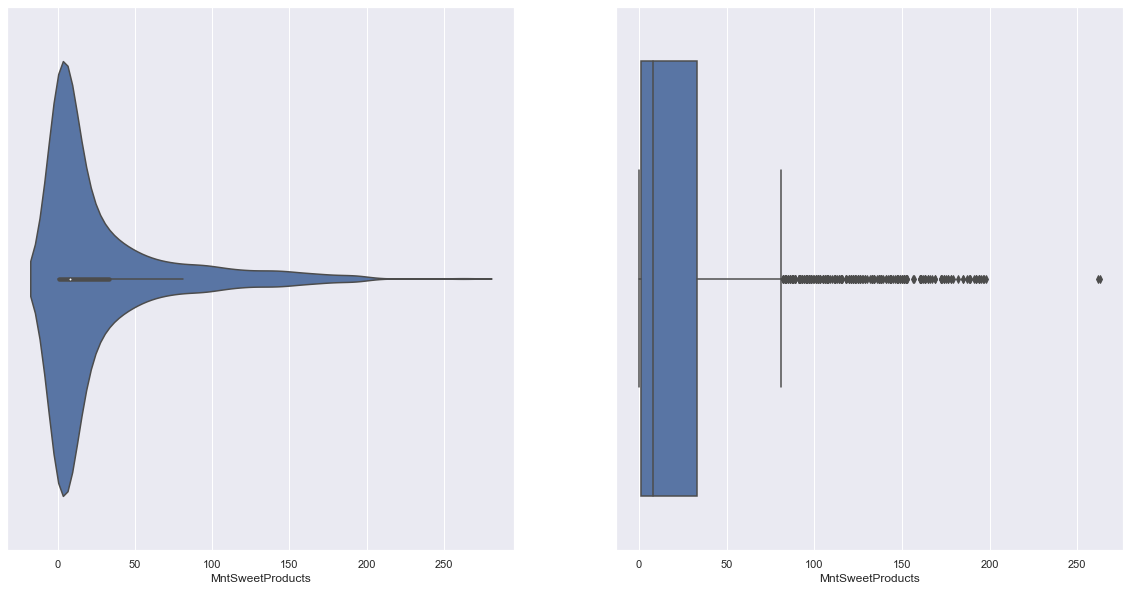

MntGoldProds


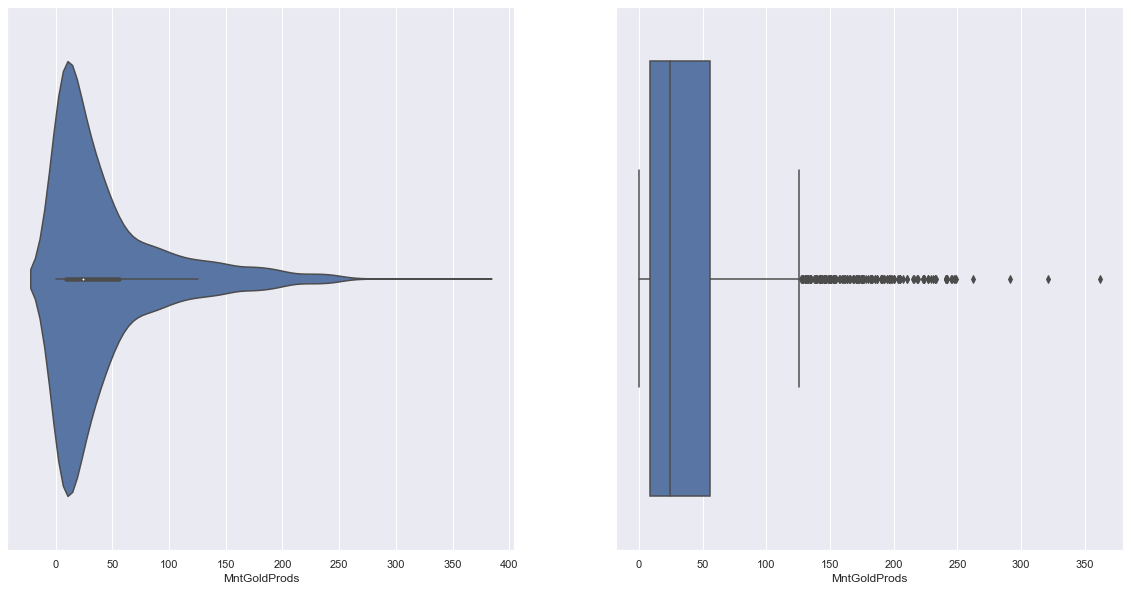

NumDealsPurchases


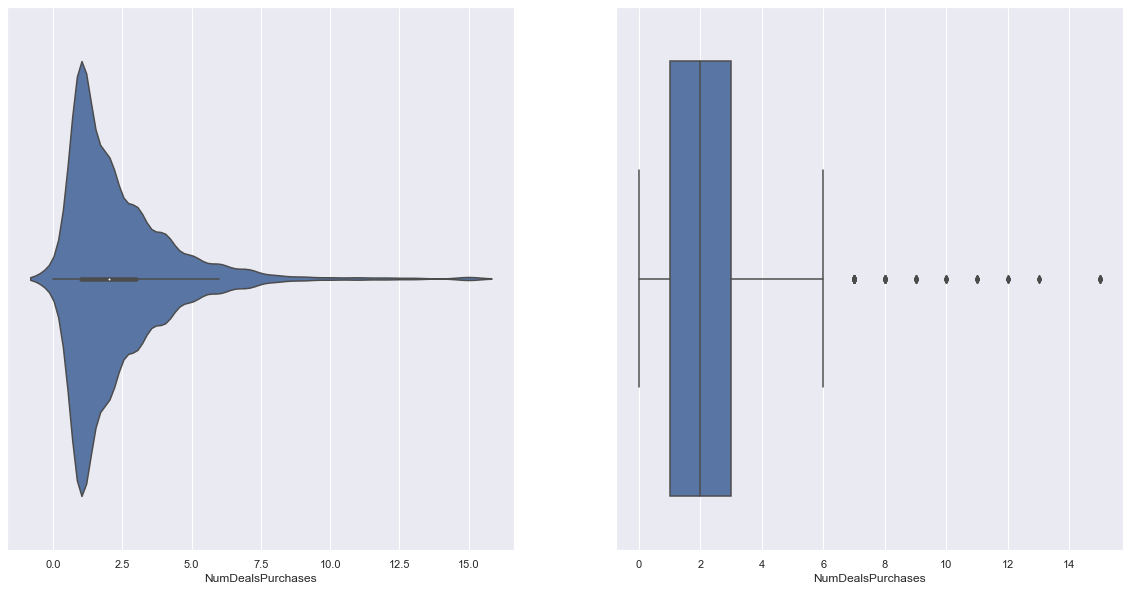

NumWebPurchases


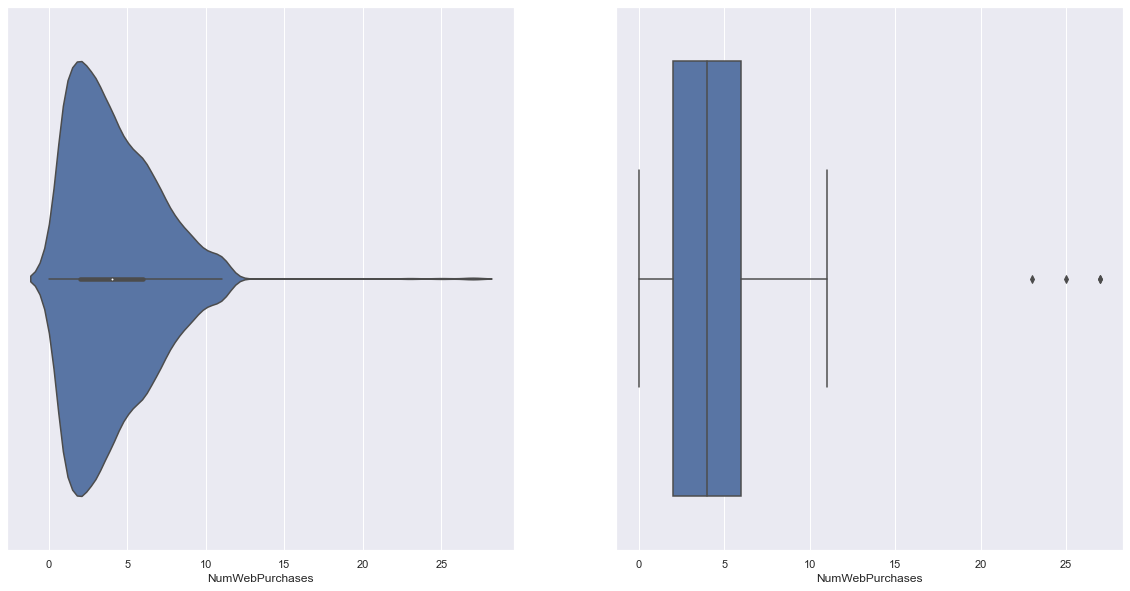

NumCatalogPurchases


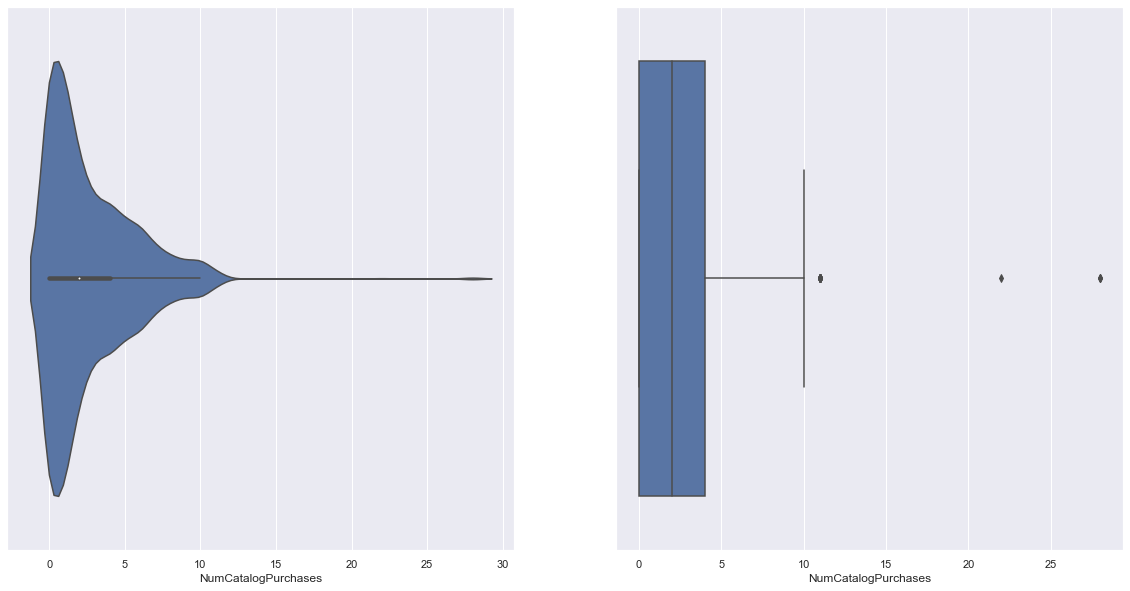

NumStorePurchases


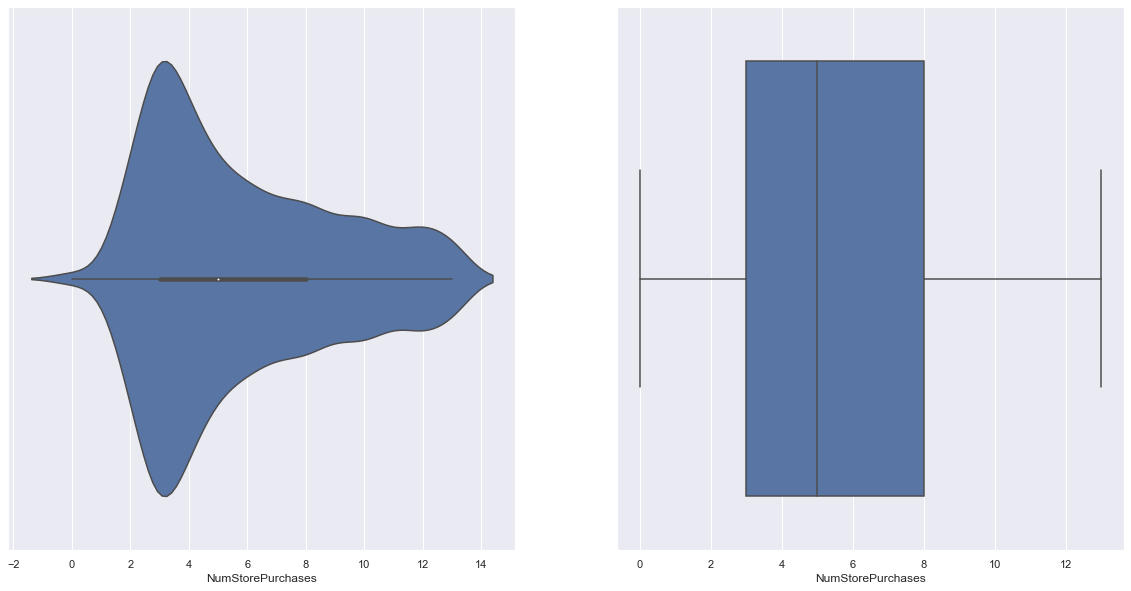

NumWebVisitsMonth


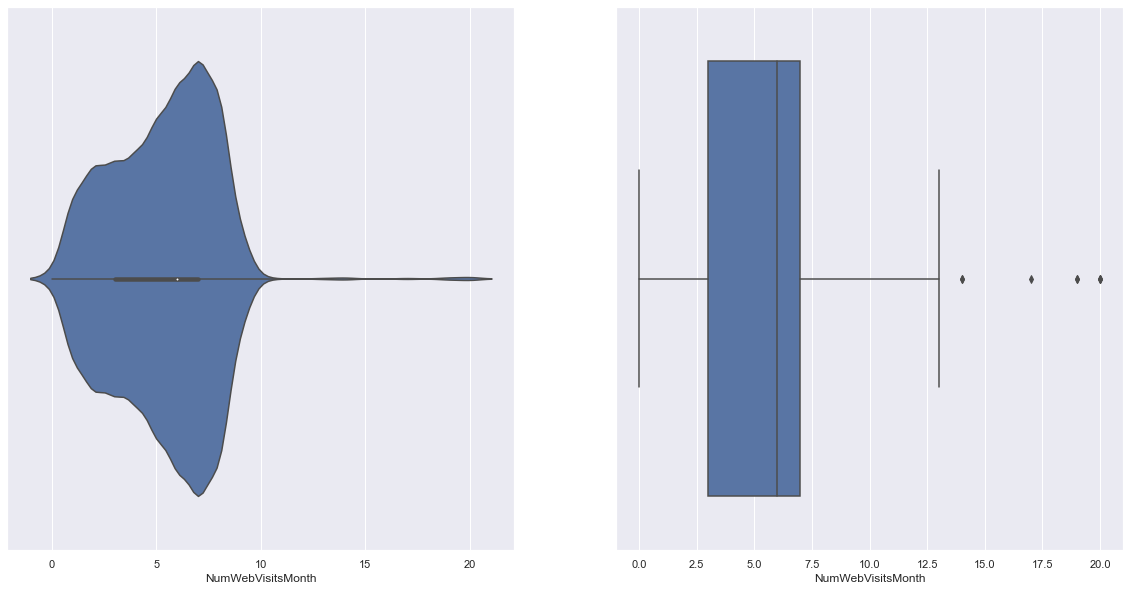

In [17]:
#variables continues
for col in df_quant_dist:
    sn.set(style='darkgrid')
    fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=2)   
    print(f'{col}') 
    #sn.distplot(df_quant_dist[col], ax=ax[0])    
    sn.violinplot(df_quant_dist[col], ax=ax[0])
    sn.boxplot(x=df_quant_dist[col], ax=ax[1])
    plt.show()

Ces violontplots nous permettent de visualiser la distribution des données et leur densité de probabilité. nous observons une distribution asymétrique etaléé vers la gauche.

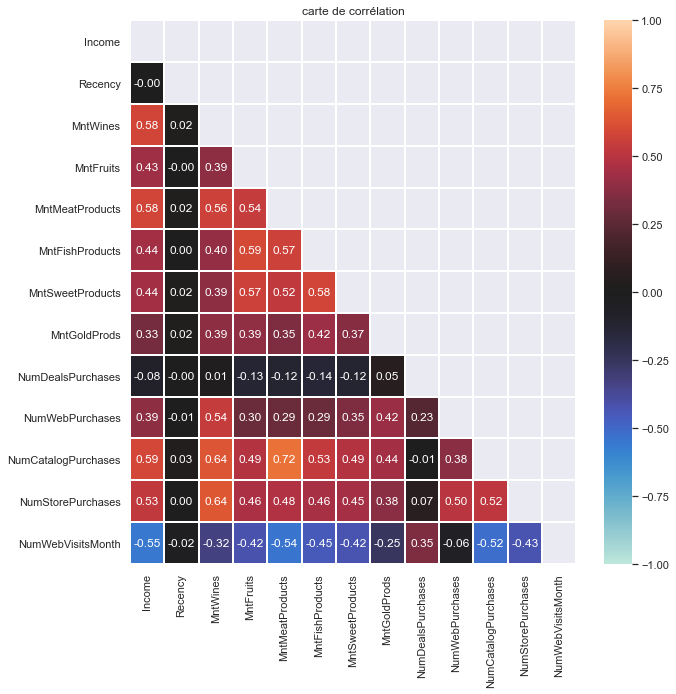

In [18]:
#croisement entre données quantitatives avec matrice de corrélation
def plot_heatmap(df):
    cor_map = df.corr()
    plt.figure(figsize = (10,10))
    mask =  np.triu(np.ones_like(cor_map, dtype=bool))
    sn.heatmap(cor_map, mask = mask, center=0, linewidths=1, annot= True, fmt = '.2f', vmin=-1, vmax=1) 
    plt.title('carte de corrélation')
    plt.show
    
plot_heatmap(df_quant_dist)

la carte de corrélation nous montre qu'il n'existe pas de tres forte correlation entre les variables. Neanmoins nous notons une correlation significative entre le nombre d'achat effectué avec un catalogue(NumCtalogPurchases) et le revenu anuel du menage(Incombe), le montant de depense pour le vin (MntWines), pour la viande(MntMeatProducts), et pour le poisson (MntFishProducts), pour la sucrerie (MntSweetProducts)

#### visualisons les données qualitatives et les données quantitatives

Visualisons les montants depensés au cours des deux dernieres années en fonction de l'age, l'education et la situation matrimoniale

In [19]:
#catégorisons les ages
data['Year_Birth'].max(), data['Year_Birth'].min()
#les ages sont compris entre 1996 et 1893
#l'age maximum sera 2021- 1893 = 128 ans
#l'age minimun sera 2021 - 1996 =  25 ans

(1996, 1893)

In [20]:
#creons une fonction pour categoriser les ages
def ages(x):
    if x<=45:
        annee='25 - 45 ans'
    if 45<x<=65:
        annee='45 - 65 ans'
    if x>=65:
        annee='> 65 ans'
    return annee

In [21]:
data['ages']= 2021 - data["Year_Birth"]
data['age']=data["ages"].map(ages)

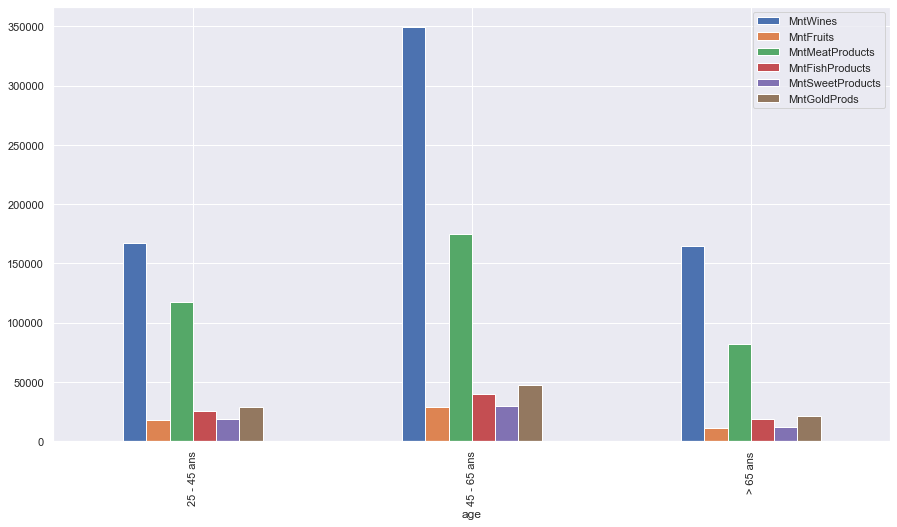

In [22]:
#age
age_depense = data.groupby('age').sum()[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
age_depense.plot.bar(figsize=(15, 8));

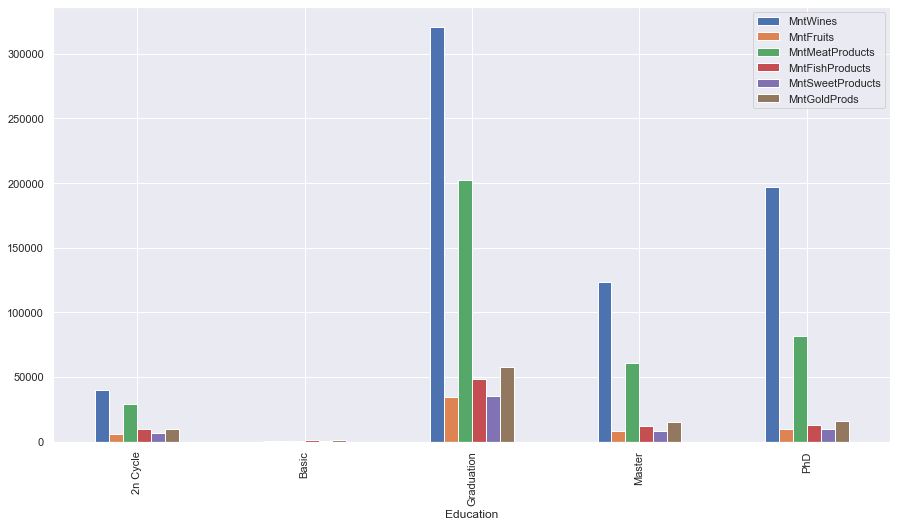

In [23]:
#education
education_depense= df.groupby('Education').sum()[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
education_depense.plot.bar(figsize=(15, 8));

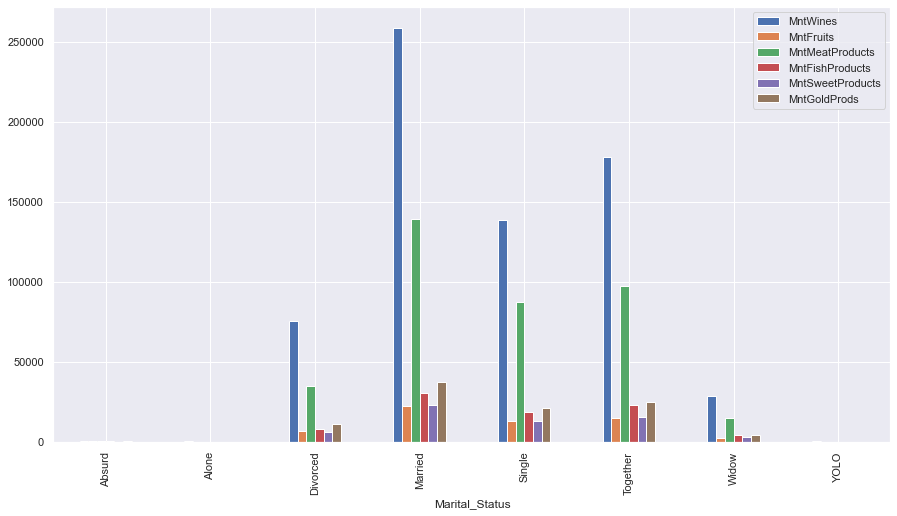

In [24]:
#situation matrimoniale
statut_depense = df.groupby('Marital_Status').sum()[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'                                                 ]]
statut_depense.plot.bar(figsize=(15, 8));

ces graphes nous montrent  que :
les clients dont l'age  est compris entre 45 et 65 ans, pour la pluspart mariés, avec un niveau d'éducation élévé(graduation ont effectués plus de depense concernant les produits du vin et de la viande.

visualisons en fonction du nombre d'achat effectué

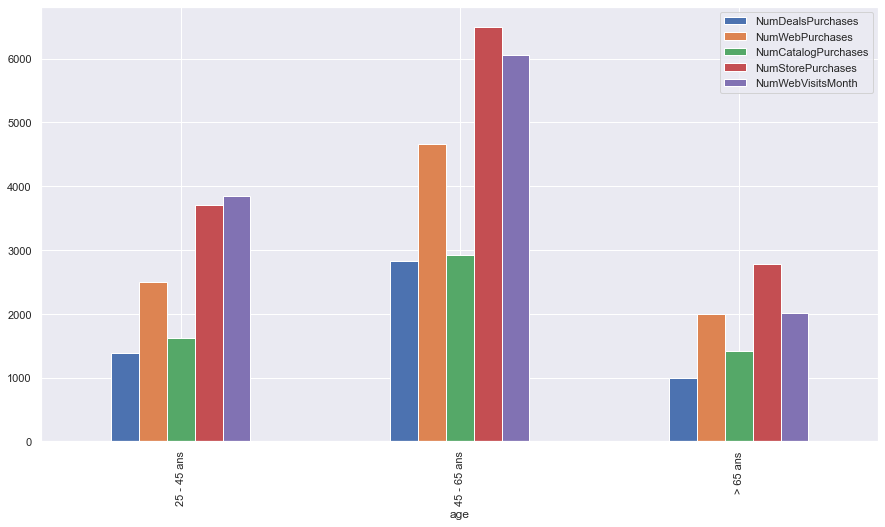

In [25]:
age_achat = data.groupby('age').sum()[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
age_achat.plot.bar(figsize=(15, 8));

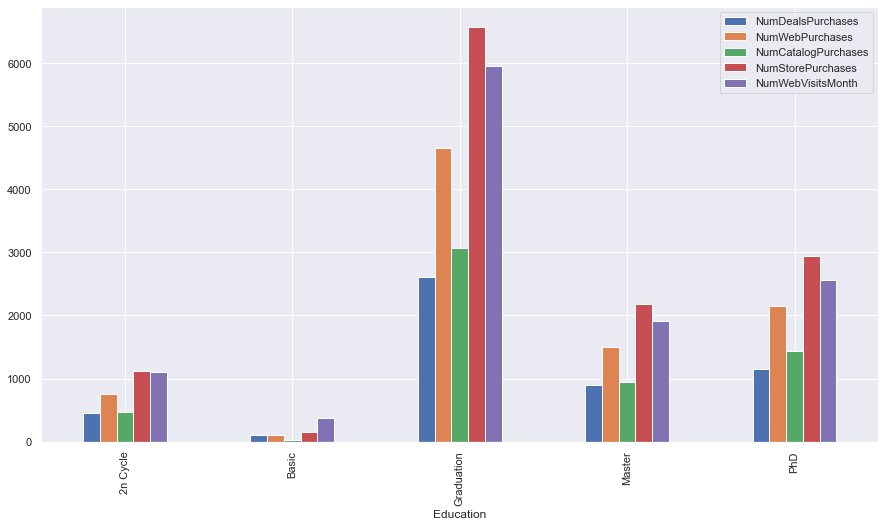

In [26]:
education_achat = data.groupby('Education').sum()[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
education_achat.plot.bar(figsize=(15, 8));

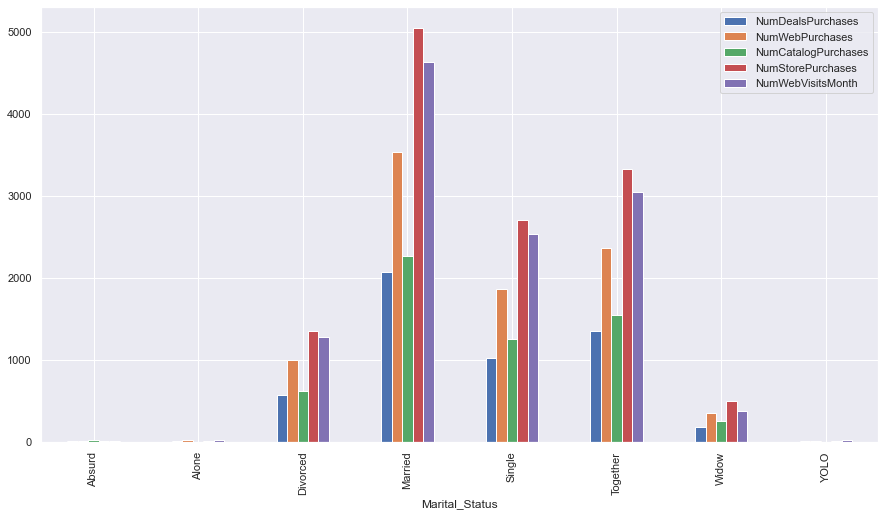

In [27]:
status_achat = data.groupby('Marital_Status').sum()[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
status_achat.plot.bar(figsize=(15, 8));

ces graphes montrent que:
les clients dont l'age  est compris entre 45 et 65 ans, pour la pluspart mariés, avec un niveau d'éducation élévé(graduation) ont effectués en majorité des achats directement dans le magasin, et on plus visité le site web.

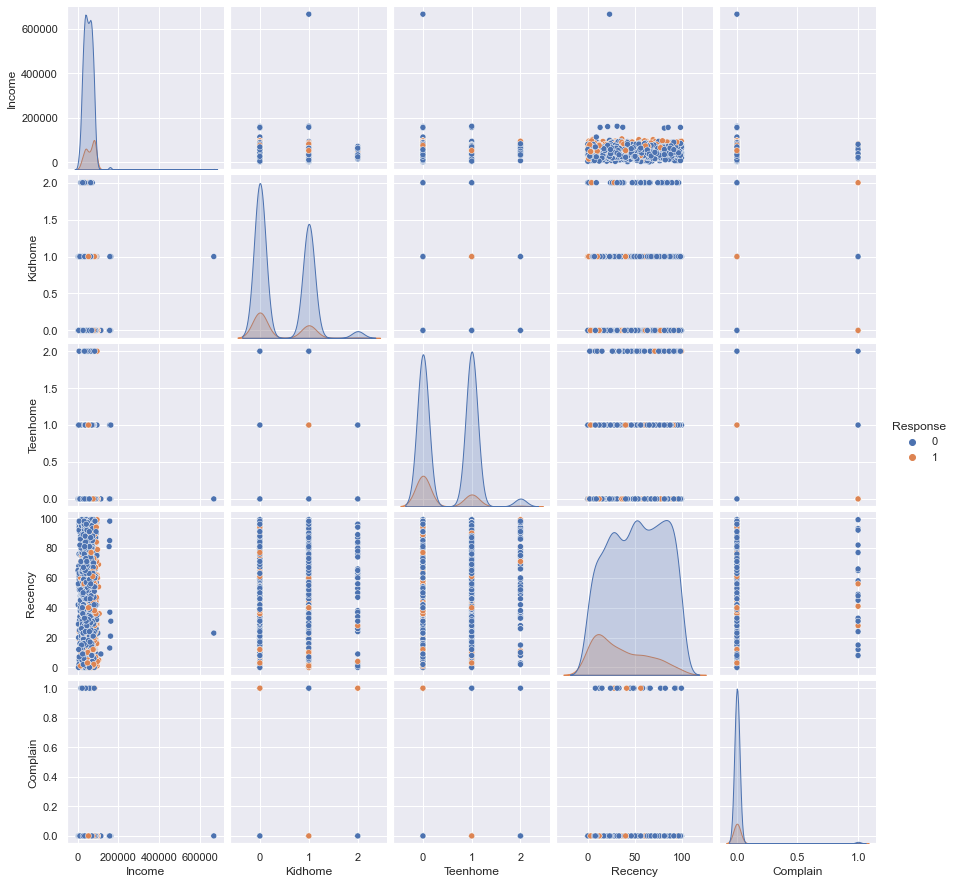

In [28]:
sn.pairplot(data = data,hue = 'Response', vars = ['Income', 'Kidhome','Teenhome', 'Recency', 'Complain']);

Nous observons que les clients qui ont accepter la derniere offre de campagne ont un revenu annuel elévé, avec en general deux enfants a leur charge et ont se plaigne souvent

### Preprocessing

In [47]:
data1 = df.copy()

In [48]:
#voir les valeurs manquantes
data1.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Nous observons 24 valeurs manquantes au niveau de la variable icombe(revenu annuel)

In [49]:
#traitement des valeurs manquantes
#nous allons supprimer les valeurs manquantes car elle ne represente pas une grande quantité dans les données
data1.dropna(axis = 0, inplace = True)

In [50]:
#verification des valeurs manquantes
data1.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [51]:
df_quant = data1.select_dtypes(exclude = object)

df_qual = data1.select_dtypes(object)

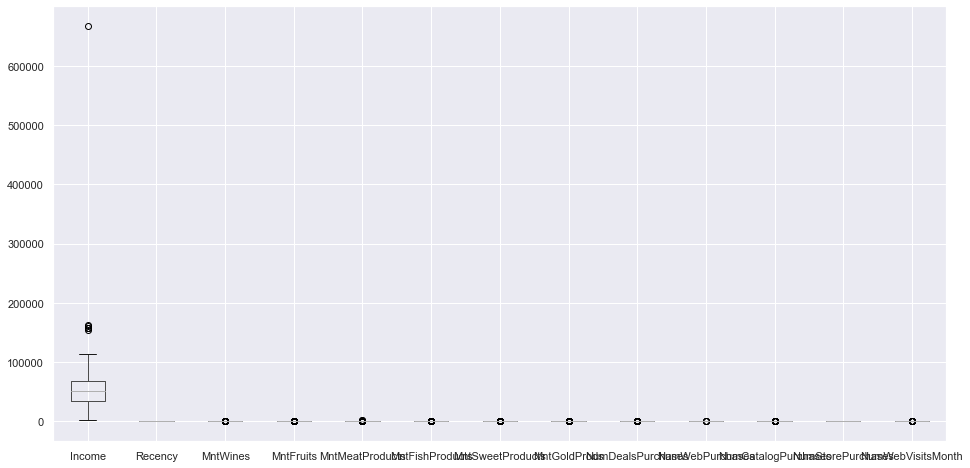

In [52]:
#voir les valeurs aberrantes
df_quant_dist.boxplot(figsize=(16,8));

les boxplots nous montrent qu'ils existe des valeurs aberrantes. AU niveau du revenu annuel c'est possible qu'il y'est des revenus tres élévé que d'autres. donc nous ne traiterons pas ses valeurs. elles seront traitée apres si jamais notre modelisation n'est pas satisfaisante.

### Encodage des variables

In [53]:
#encodage des variables qualitatifs
df_qual.head(5)

,Education,Marital_Status
ID,,
5524,Graduation,Single
2174,Graduation,Single
4141,Graduation,Together
6182,Graduation,Together
5324,PhD,Married


In [54]:
df_qual['Education'].value_counts(), df_qual['Marital_Status'].value_counts()

(Graduation    1116
 PhD            481
 Master         365
 2n Cycle       200
 Basic           54
 Name: Education, dtype: int64,
 Married     857
 Together    573
 Single      471
 Divorced    232
 Widow        76
 Alone         3
 YOLO          2
 Absurd        2
 Name: Marital_Status, dtype: int64)

In [55]:
df_qual['Marital_Status'].replace({'Married':1, 'Together': 2, 'Single':3, 'Divorced':4, 'Widow':5, 'Alone':6, 'YOLO':7, 'Absurd':8}, inplace = True)

In [56]:
#fonction d'encodage
def encode(data):
    code1 = {
        'Graduation':0,      
        'PhD':1,
        'Master':2,
        '2n Cycle':3,        
        'Basic':4,
    }

    for col in data.select_dtypes('object'):
        data[col] = data[col].map(code1)
    return data

In [180]:
# encode(df_qual)

In [58]:
df_qual.shape

(2216, 2)

### Normalisation

In [59]:
df_quant.head(5)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [60]:
df_quant.shape

(2216, 23)

In [61]:
#normalisation
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_quant_nor=scaler.fit_transform(df_quant)
df_quant_nor= pd.DataFrame(df_quant_nor, index = df_quant.index, columns= df_quant.columns)

In [74]:
#concatenons les differents data
normal = pd.concat([df_quant_nor, df_qual], axis = 1)
normal.head(5)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
ID,,,,,,,,,,,,,,,,,,,,,,,,,
5524,-0.722222,0.203393,0.0,0.0,0.18,0.957380,2.580645,2.210405,3.404255,2.50000,1.351064,0.5,1.00,2.00,-0.2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,3
2174,-0.888889,-0.151645,1.0,1.0,-0.22,-0.339917,-0.225806,-0.286705,-0.212766,-0.21875,-0.393617,0.0,-0.75,-0.25,-0.6,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
4141,-0.277778,0.609034,0.0,0.0,-0.46,0.522869,1.322581,0.272832,2.106383,0.40625,0.372340,-0.5,1.00,0.00,1.0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
6182,0.777778,-0.744619,1.0,0.0,-0.46,-0.339917,-0.129032,-0.221965,-0.042553,-0.15625,-0.414894,0.0,-0.50,-0.50,-0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
5324,0.611111,0.208059,1.0,0.0,0.90,-0.003119,1.129032,0.231214,0.723404,0.59375,-0.202128,1.5,0.25,0.25,0.2,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


## Segmentation des clients (Clustering)

In [183]:
from sklearn.cluster import KMeans
from sklearn import cluster

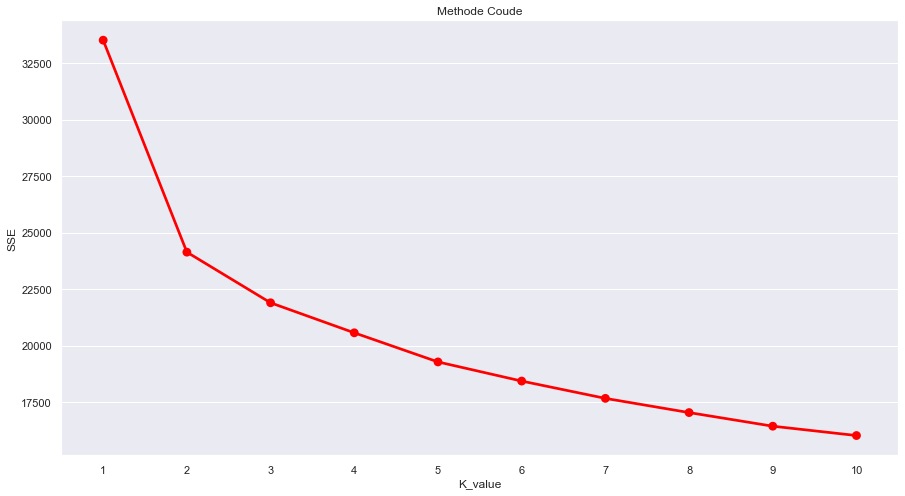

In [73]:
plt.figure(figsize=(15,8))
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normal)   
    # centre de gravité du cluster le plus proche
    sse[k] = kmeans.inertia_ 
plt.title('Methode Coude')
plt.xlabel('K_value')
plt.ylabel('SSE')
sn.pointplot(x=list(sse.keys()), y=list(sse.values()), linewidth = 2, color = 'red', marker = '8')
plt.show()


la methode coude nous permet de visualiser 3 clusters, utilisons les 3 pour la suite

In [196]:
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(normal)
print(label)

[1 0 1 ... 2 2 0]


In [197]:
print(kmeans.cluster_centers_)

[[ 6.98960044e-02 -4.93744010e-01  7.72413793e-01  4.54187192e-01
   2.24630542e-03 -2.74716057e-01 -1.10821548e-01 -2.12744099e-01
  -1.19526255e-01 -1.01416256e-01 -2.23970234e-01 -1.82266010e-02
  -4.79802956e-01 -3.69211823e-01 -3.55665025e-01  1.02709360e-01
   6.69950739e-02  1.37931034e-02  0.00000000e+00  9.85221675e-04
   1.97044335e-03  1.18226601e-02  8.76847291e-02  1.06108374e+00
   2.11231527e+00  1.00000000e+00  1.00000000e+00]
 [-1.01340996e-01  7.04123004e-01  5.17241379e-02  2.53448276e-01
   2.30689655e-02  8.39762707e-01  2.11368187e+00  1.73616903e+00
   1.96294938e+00  2.14240302e+00  1.20950110e+00 -2.36206897e-01
   3.81034483e-01  9.46551724e-01  7.06206897e-01 -7.08189655e-01
   7.58620690e-02  8.96551724e-02  2.13793103e-01  1.89655172e-01
   2.24137931e-02  6.89655172e-03  2.63793103e-01  7.51724138e-01
   2.22241379e+00  2.00000000e+00  2.00000000e+00]
 [-2.53444266e-01  2.42370485e-01  2.65700483e-01  8.24476651e-01
  -2.43156200e-02  6.33524829e-01  3.199

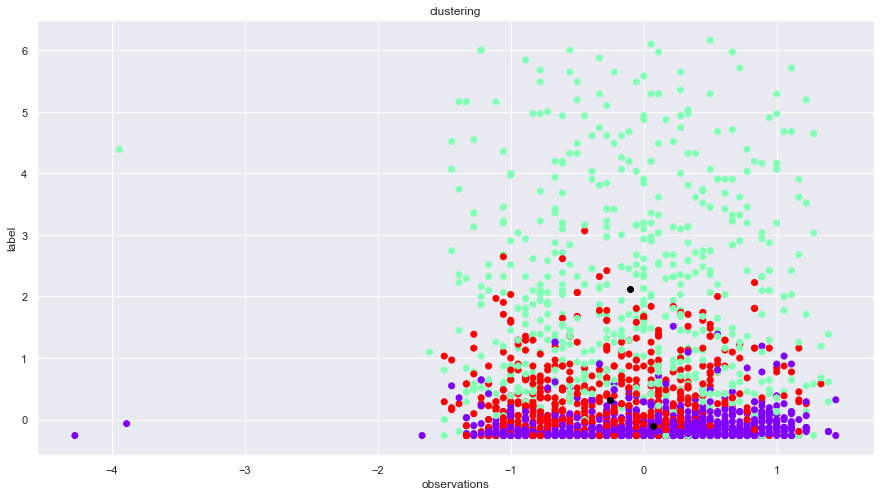

In [198]:
plt.figure(figsize=(15,8))
plt.scatter(normal.iloc[:,0], normal.iloc[:, 6], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,6], color = 'black')
plt.title('clustering')
plt.xlabel('observations')
plt.ylabel('label')
plt.show()

vue que nous ne visualisons que avec deux variables et qui ne montre pas nettement nos trois clusters, nous allons utiliser une autre visualisation

In [201]:
cluste = cluster.KMeans(n_clusters=3)
cluste.fit(normal)

KMeans(n_clusters=3)

In [202]:
cluste.labels_

array([1, 0, 1, ..., 2, 2, 0])

In [203]:
#voir le noombre dans les differentes classes
np.unique(cluste.labels_, return_counts = True)

(array([0, 1, 2]), array([1015,  580,  621], dtype=int64))

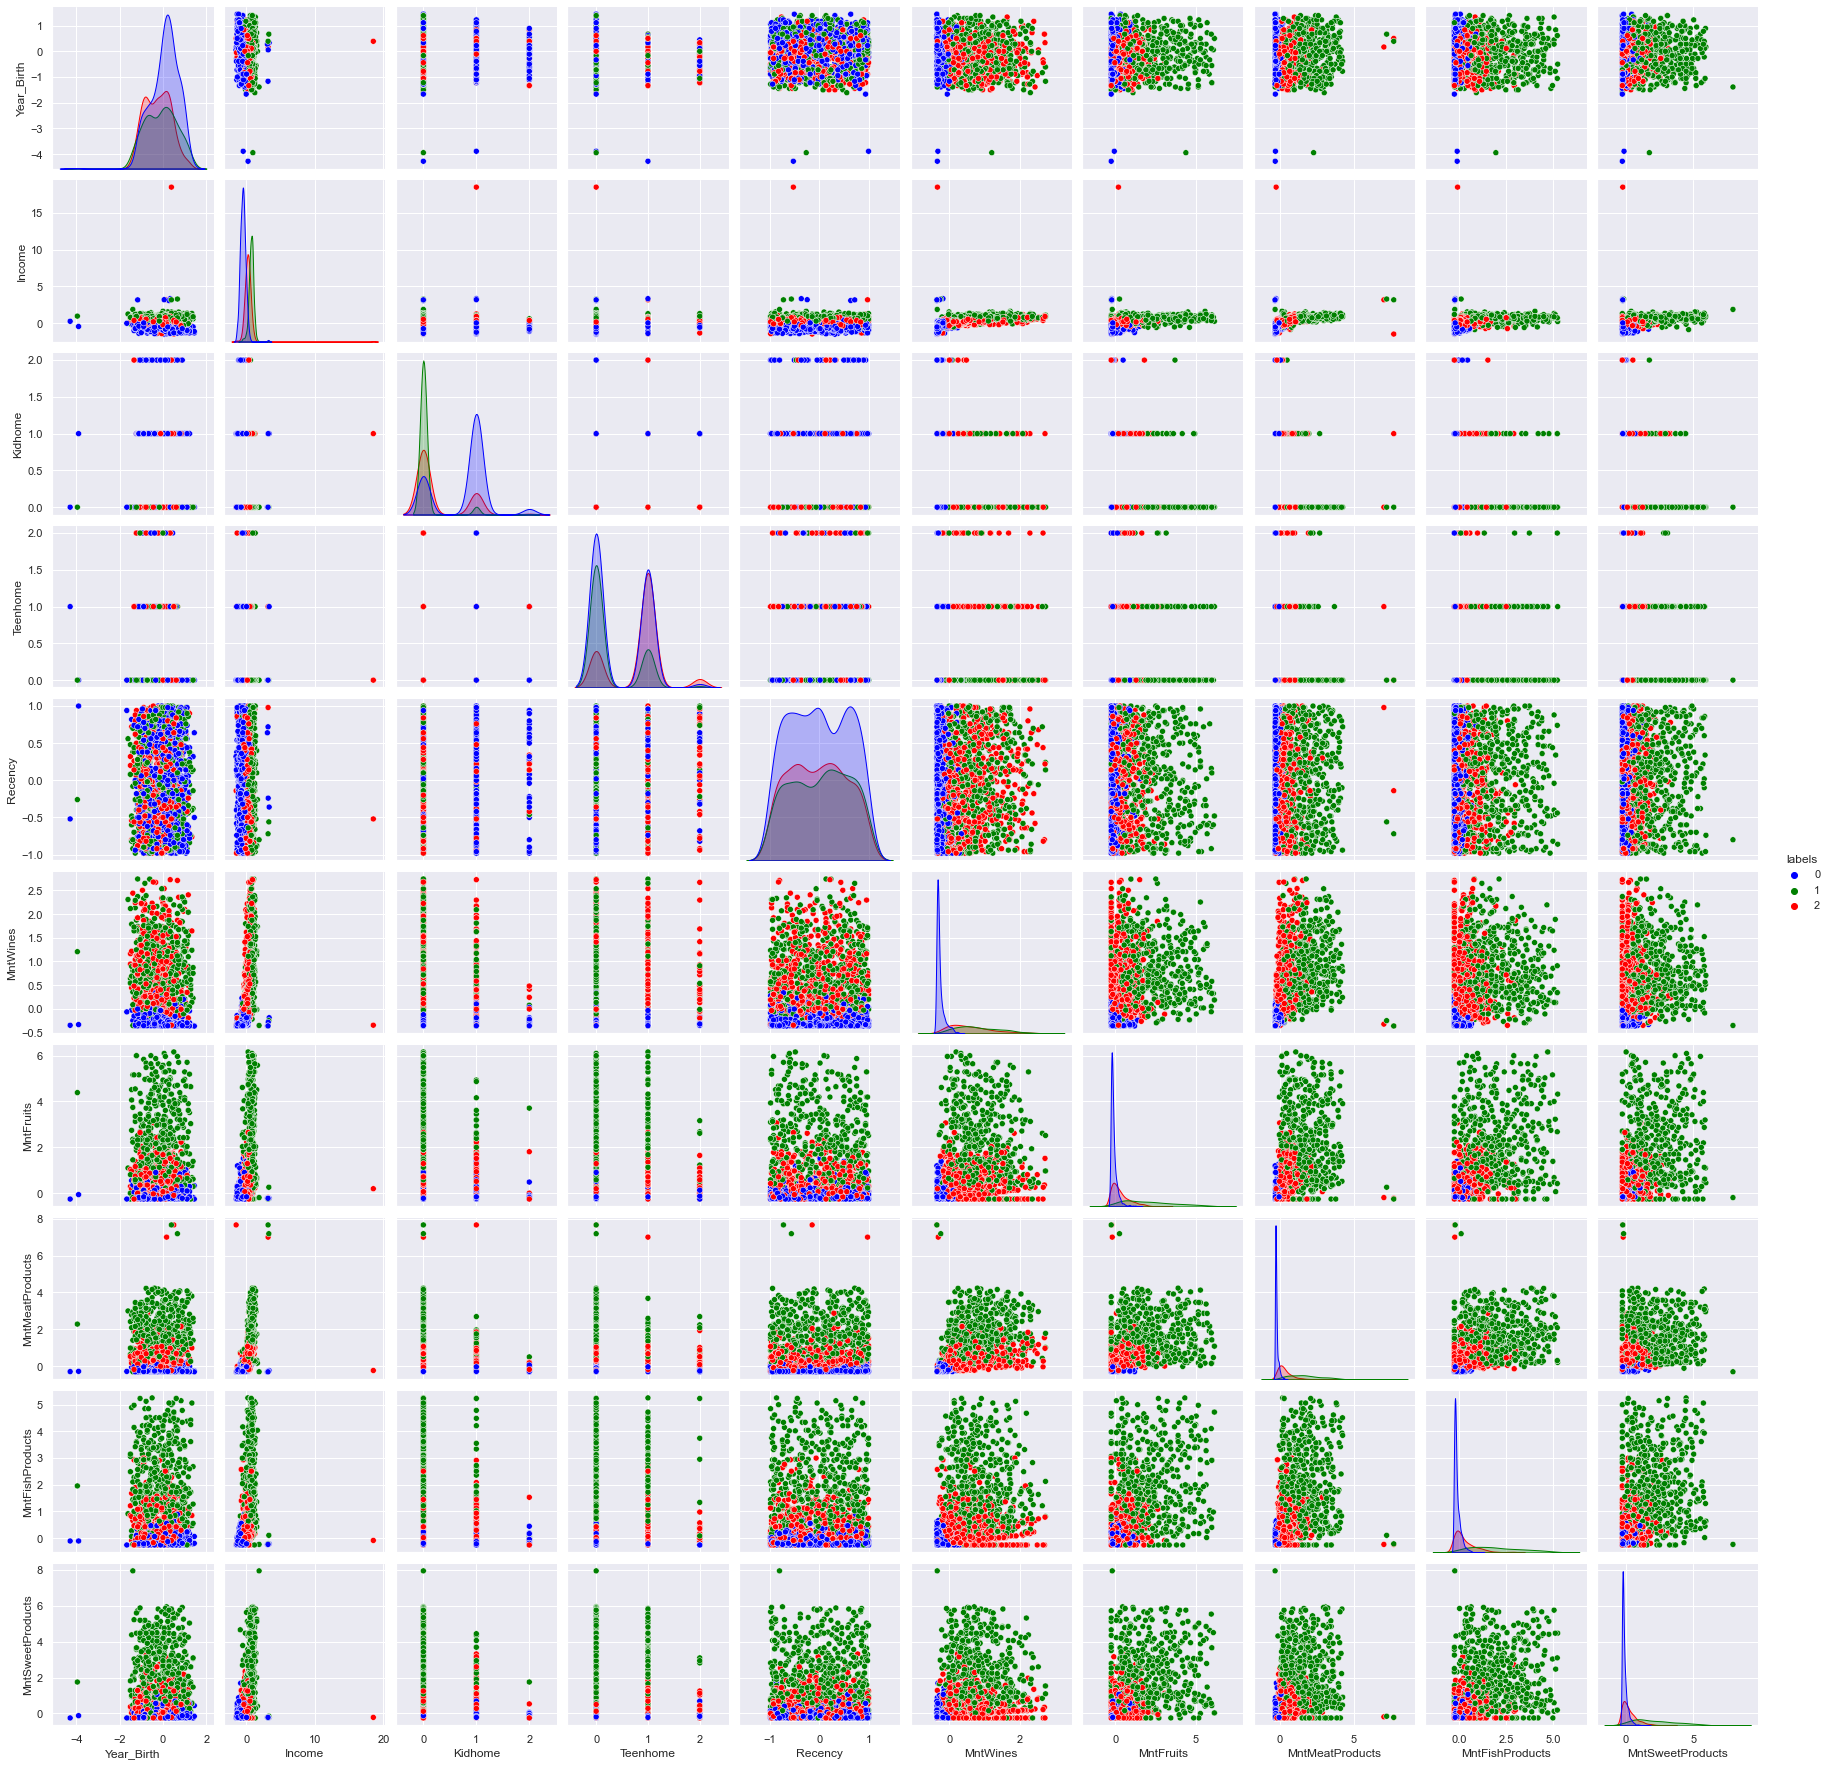

In [205]:
#utlisons nos variables pertinentes pour afficher
data = normal[['Year_Birth','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']].copy()
data['labels'] = cluste.labels_
#visualisons nos clusters
sn.pairplot(data, hue = 'labels', palette= {0:'blue', 1: 'green', 2: 'red'});